In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
import matplotlib.cm as cm
%matplotlib inline
#from matplotlib import cm

In [2]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

In [3]:
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_keymark = data_keymark.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
Models=data_keymark['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
K = 273.15
eta_carnot_key = (data_keymark['T_out']+K) / ((data_keymark['T_out']+K)-(data_keymark['T_in']+K))
data_keymark['eta'] = data_keymark['COP'] / eta_carnot_key
data_keymark.fillna(0, inplace=True)
paradf = pd.read_csv('para.csv', delimiter=',')

In [4]:
data_ref = pd.read_csv(r'validation\AIT_SWCV_122\ait-SWCV-diagramm.csv', delimiter=',', decimal=',')
data_ref.drop(['P_el','P_th'], axis=1)
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    if model=='WPF 10 basic, all climates':
        data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
        data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
        data_key = data_key.loc[data_key['Model'] == model]
        #temp=['cold', 'average', 'warm']
        
        data_key = data_key.loc[data_key['Climate']== 'average']
        
        K = 273.15
        eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
        data_key['eta'] = data_key['COP'] / eta_carnot_key
        data_key.fillna(0, inplace=True)
        variables=['P_el', 'P_th', 'COP', 'eta']
        
        for var in variables:
            vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
            data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
            data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
            d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
            vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])

        para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
        para_key['P_el']=P_el_para_key
        para_key['P_th']=P_th_para_key
        para_key['COP']=COP_para_key
        para_key['eta']=eta_para_key
        data_ref['COP_fit_key'] = func_simple(para_key['COP'], data_ref['T_in'], data_ref['T_out'])
        #print(para_key['COP'])
        k1.append(P_th_para_key[0])
        k2.append(P_th_para_key[1])
        k3.append(P_th_para_key[2])
        k4.append(P_el_para_key[0])
        k5.append(P_el_para_key[1])
        k6.append(P_el_para_key[2])
        k7.append(COP_para_key[0])
        k8.append(COP_para_key[1])
        k9.append(COP_para_key[2])    
        
        fig, axes = plt.subplots(nrows=1, ncols=1)
        #data_ref.plot(ax=axes, x='T_in', y, kind='scatter', label='P_el_35', c='Blue', title='P_el: Comparison between reference data and fits')
        data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
        data_ref[data_ref['T_out']==55].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='COP', c='Blue', linestyle='--', title=model)
        data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th', c='Blue', linestyle='-')
        plt.show()
    else:
        continue
#paradf=pd.DataFrame()
#paradf['Model']=Models
#paradf['k1']=k1
#paradf['k2']=k2
#paradf['k3']=k3
#paradf['k4']=k4
#paradf['k5']=k5
#paradf['k6']=k6
#paradf['k7']=k7
#paradf['k8']=k8
#paradf['k9']=k9
#filt = (paradf['k1']>0)
#paradf.loc[filt, 'Modus'] = 'On-Off'
#filt = (paradf['k1']<0)
#paradf.loc[filt, 'Modus'] = 'Inverter'
#paradf.loc[paradf['Modus']=='On-Off']
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})

FileNotFoundError: [Errno 2] No such file or directory: 'validation\\AIT_SWCV_122\\ait-SWCV-diagramm.csv'

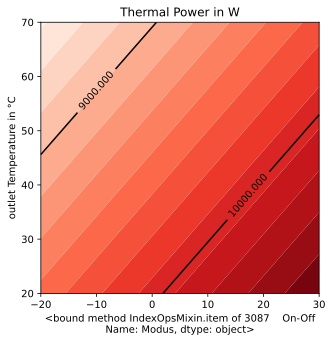

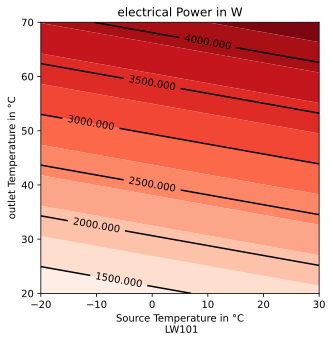

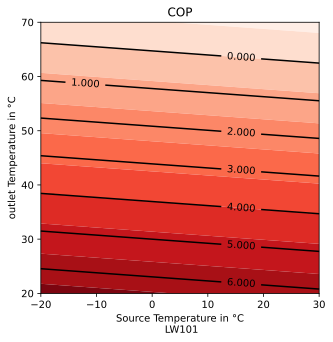

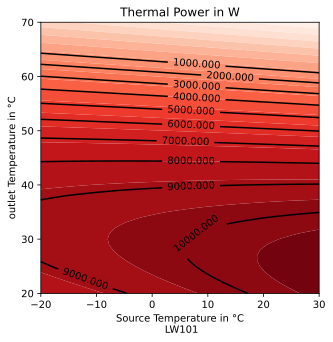

In [5]:
for model in Models:
    if model!='WPF 10 basic, all climates':
        continue
    else:
        onemodel = paradf.loc[paradf['Model'] == model]
        value1 = onemodel['k1'].to_numpy()
        value2 = onemodel['k2'].to_numpy()
        value3 = onemodel['k3'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k4'].to_numpy()
        value2 = onemodel['k5'].to_numpy()
        value3 = onemodel['k6'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0000,5000,500)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k7'].to_numpy()
        value2 = onemodel['k8'].to_numpy()
        value3 = onemodel['k9'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0,10,1)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        k1 = onemodel['k1'].to_numpy()[0]
        k2 = onemodel['k2'].to_numpy()[0]
        k3 = onemodel['k3'].to_numpy()[0]
        k4 = onemodel['k4'].to_numpy()[0]
        k5 = onemodel['k5'].to_numpy()[0]
        k6 = onemodel['k6'].to_numpy()[0]
        k7 = onemodel['k7'].to_numpy()[0]
        k8 = onemodel['k8'].to_numpy()[0]
        k9 = onemodel['k9'].to_numpy()[0]
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for x in T_low:
            for y in T_high:
                p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


In [4]:
#data_keymark=data_keymark.merge(paradf, how='inner', on='Model')
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key.loc[data_key['Model']== 'ELFOEnergy Storm EVO WSAN-YES 18.2']

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
14828,Clivet,ELFOEnergy Storm EVO WSAN-YES 18.2,2020-12-23,Outdoor Air/Water,NaN,83.0,R32,15.0,97,41.0,EN 14825,average,-7,34,36000,2.76,13043
14829,Clivet,ELFOEnergy Storm EVO WSAN-YES 18.2,2020-12-23,Outdoor Air/Water,NaN,83.0,R32,15.0,97,41.0,EN 14825,average,2,30,22900,3.96,5783
14830,Clivet,ELFOEnergy Storm EVO WSAN-YES 18.2,2020-12-23,Outdoor Air/Water,NaN,83.0,R32,15.0,97,41.0,EN 14825,average,7,27,19900,4.83,4120
14831,Clivet,ELFOEnergy Storm EVO WSAN-YES 18.2,2020-12-23,Outdoor Air/Water,NaN,83.0,R32,15.0,97,41.0,EN 14825,average,12,24,24400,7.05,3461


In [6]:
#paradf.to_csv('para.csv', encoding='utf-8', index=False)

In [39]:
new_df = pd.read_csv('hplib-database_heating.csv', delimiter=',')
new_df = new_df.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
new_df=new_df.loc[new_df['Model']== 'SWCV 162(H)(K)3']
# calculate COP and quality grade (eta)
K = 273.15
new_df['COP'] = new_df['P_th'] / new_df['P_el']
eta_carnot_key = (new_df['T_out']+K) / ((new_df['T_out']+K)-(new_df['T_in']+K))
new_df['eta'] = new_df ['COP'] / eta_carnot_key
new_df.fillna(0, inplace=True)

#adding another support point at T_in=20
df2 = pd.read_csv('hplib-database_heating.csv', delimiter=',')
df2 = df2.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
df2=df2.loc[df2['Model']== 'SWCV 162(H)(K)3']
df2=df2.loc[df2['T_in']==12]
df2.loc[df2['T_in']==12,['T_in']]=20
K = 273.15
df2['COP'] = df2['P_th'] / df2['P_el']
eta_carnot_key = (df2['T_out']+K) / ((df2['T_out']+K)-(df2['T_in']+K))
df2['eta'] = df2 ['COP'] / eta_carnot_key
df2.fillna(0, inplace=True)
new_df1=pd.concat([new_df,df2])
#adding another support point at T_in=25
df3 = pd.read_csv('hplib-database_heating.csv', delimiter=',')
df3 = df3.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
df3=df3.loc[df3['Model']== 'SWCV 162(H)(K)3']
df3=df3.loc[df3['T_in']==12]
df3.loc[df3['T_in']==12,['T_in']]=25
K = 273.15
df3['COP'] = df3['P_th'] / df3['P_el']
eta_carnot_key = (df3['T_out']+K) / ((df3['T_out']+K)-(df3['T_in']+K))
df3['eta'] = df3 ['COP'] / eta_carnot_key
df3.fillna(0, inplace=True)
new_df2=pd.concat([new_df1,df3])
new_df2

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in,T_out,P_th,COP,P_el,eta
1608,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,-7,34,14200,4.190027,3389,0.559307
1609,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,-7,52,14200,3.000211,4733,0.544402
1610,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,2,30,8700,5.259976,1654,0.485830
1611,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,2,42,8700,4.099906,2122,0.520375
1612,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,7,27,5700,6.057386,941,0.403624
1613,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,7,36,5600,4.899388,1143,0.459590
1614,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,average,12,24,5800,5.882353,986,0.237551
1615,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,average,12,30,5500,5.000000,1100,0.296883
1616,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,15.9,EN 14825,warm,2,35,15900,3.890384,4087,0.416624
1617,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44.0,0.0,R407c,2.2,7,16.0,EN 14825,warm,2,55,15400,2.800000,5500,0.452232


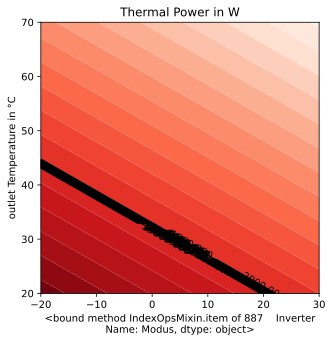

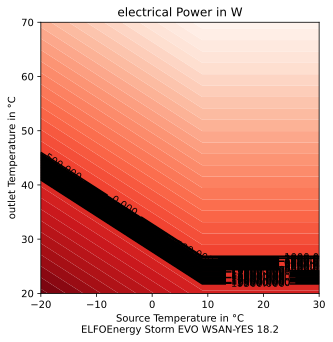

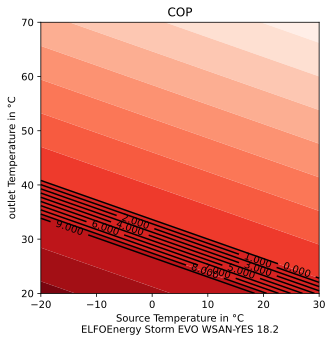

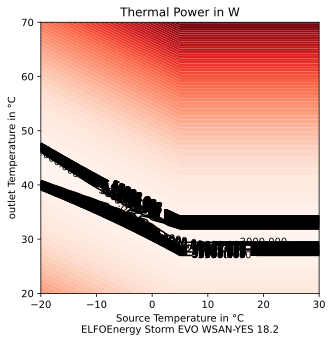

In [5]:
for model in Models:
    if model!='ELFOEnergy Storm EVO WSAN-YES 18.2':#define wich model to plot:  'LW 101' for on off 
                                                #   'SWCV 162(H)(K)3'; 'WPE-I 33H 400 Premium' for Inverter
                                                #   'LW 180A' ; 
        continue
    else:
        #reading parameters
        onemodel = paradf.loc[paradf['Model'] == model]
        k1 = onemodel['k1'].to_numpy()[0]#T_in for Pth
        k2 = onemodel['k2'].to_numpy()[0]#T_out for Pth
        k3 = onemodel['k3'].to_numpy()[0]#constant for Pth
        k4 = onemodel['k4'].to_numpy()[0]#T_in for Pel
        k5 = onemodel['k5'].to_numpy()[0]#T_out for Pel
        k6 = onemodel['k6'].to_numpy()[0]#constant for Pel
        k7 = onemodel['k7'].to_numpy()[0]#T_in for COP
        k8 = onemodel['k8'].to_numpy()[0]#T_in for COP
        k9 = onemodel['k9'].to_numpy()[0]#constant for COP
        modus = onemodel['Modus'].item
        T_low=[*range(-20,31,1)]#inflow TEMP
        T_high=[*range(20,71,1)]#outflow TEMP
        Tin=[]
        Tout=[]
        Pth_keyfit=[]

        for x in T_low:
            for y in T_high:
                p_th_keyfit = k1*x + k2*y + k3#formula for Pth
                Tin.append(x)
                Tout.append(y)
                Pth_keyfit.append(p_th_keyfit)
        #create Dataframe for plotting        
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


        # KEYMARK fit from P_el
        #Pel(x,y)=k4*x+k5*y+k6
        Tin=[]
        Tout=[]
        Pel_keyfit=[]
        for x in T_low:
            for y in T_high:
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6): #define minimum value of electric Power
                if x>9: #7-11
                    p_el = 9*k4+k5*y+k6
                else:
                    #otherwise use the normal formula of the fit
                    p_el = k4*x + k5*y + k6 
                Tin.append(x)
                Tout.append(y)
                Pel_keyfit.append(p_el)
        #Create dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pel']=Pel_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pel').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0000,20000,500)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
       
        #COP Keyfit:
        #COP(x,y)=k7*x+k8*y+k9
        Tin=[]
        Tout=[]
        COP_keyfit=[]
        for x in T_low:
            for y in T_high:
                #calculate COP from the fit parameters
                cop = k7*x + k8*y + k9
                Tin.append(x)
                Tout.append(y)
                COP_keyfit.append(cop)
        #Create Dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['COP']=COP_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='COP').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0,10,1)])

        # Generate a color mapping of the levels we've specified
        
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()

        #Pth from parameters of COP and Pel
        # Pth(x,y)=Pel(x,y)*COP(x,y)
        # Pth(x,y)=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
        Tin=[]
        Tout=[]
        Pth=[]
        for x in T_low:
            for y in T_high:
                p_th_12=k5*k7*x*y+k6*k7*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #value if k4=0 see electric Power for more details
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6):
                if x>5: #4-7°C
                    p_th = k4*k7*5*5+(k4*k8+k5*k7)*5*y+(k4*k9+k6*k7)*5+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                else:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #normal formula of the fit
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        #Create DataFrame for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,60000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n' + model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


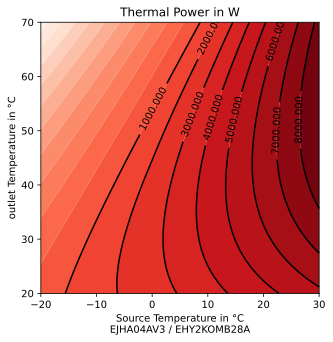

In [8]:
for model in Models:
    if model!='EJHA04AV3 / EHY2KOMB28A':#define wich model to plot
        continue
    else:
        #reading parameters
        onemodel = paradf.loc[paradf['Model'] == model]
        k1 = onemodel['k1'].to_numpy()[0]#T_in for Pth
        k2 = onemodel['k2'].to_numpy()[0]#T_out for Pth
        k3 = onemodel['k3'].to_numpy()[0]#constant for Pth
        k4 = onemodel['k4'].to_numpy()[0]#T_in for Pel
        k5 = onemodel['k5'].to_numpy()[0]#T_out for Pel
        k6 = onemodel['k6'].to_numpy()[0]#constant for Pel
        k7 = onemodel['k7'].to_numpy()[0]#T_in for COP
        k8 = onemodel['k8'].to_numpy()[0]#T_in for COP
        k9 = onemodel['k9'].to_numpy()[0]#constant for COP
        modus = onemodel['Modus'].item
        T_low=[*range(-20,31,1)]#inflow TEMP
        T_high=[*range(20,71,1)]#outflow TEMP
        #Pth from parameters of COP and Pel
        # Pth(x,y)=Pel(x,y)*COP(x,y)
        # Pth(x,y)=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
        Tin=[]
        Tout=[]
        Pth=[]
        for x in T_low:
            for y in T_high:
                p_th_12=k5*k7*x*y+k6*k7*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #value if k4=0 see electric Power for more details
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                if pel_12>(k4*x + k5*y + k6):
                    p_th = p_th_12
                else:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #normal formula of the fit
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        #Create DataFrame for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n' + model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


In [7]:
#Find out if it is a Inverter, 2 stages or on-off Heatpump
data_keymark = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
data_keymark['deltaT']=data_keymark['T_out']-data_keymark['T_in']
data_keymark= data_keymark[data_keymark['Climate']=='average']

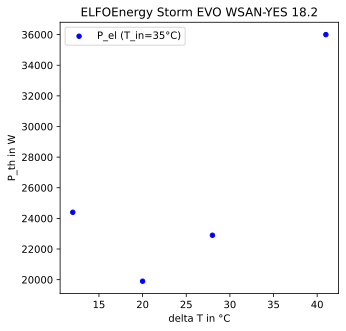

In [8]:
#2 stages
for model in Models:
    if model=='ELFOEnergy Storm EVO WSAN-YES 18.2':
        fig, axes = plt.subplots(nrows=1, ncols=1)
        data_keymark[data_keymark['Model']==model].plot(ax=axes, x='deltaT', y='P_th', kind='scatter', label='P_el (T_in=35°C)', c='Blue',title=model)
        axes.set_xlabel("delta T in °C")
        axes.set_ylabel("P_th in W")

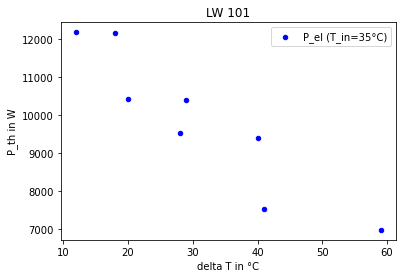

In [44]:
#1 stage
for model in Models:
    if model=='LW 101':#   'SWCV 162(H)(K)3'; 'WPE-I 33H 400 Premium' for Inverter
                                                #   'LW 180A' ;
                                                # TTF 35 
        fig, axes = plt.subplots(nrows=1, ncols=1)
        data_keymark[data_keymark['Model']==model].plot(ax=axes, x='deltaT', y='P_th', kind='scatter', label='P_el (T_in=35°C)', c='Blue',title=model)
        axes.set_xlabel("delta T in °C")
        axes.set_ylabel("P_th in W")

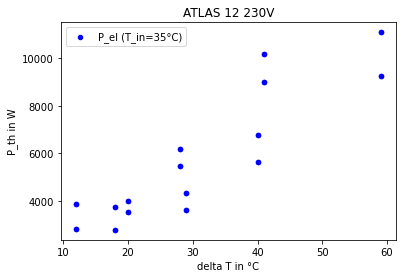

In [45]:
#Inverter heatpump
for model in Models:
    if model=='ATLAS 12 230V':
        
        fig, axes = plt.subplots(nrows=1, ncols=1)
        data_keymark[data_keymark['Model']==model].plot(ax=axes, x='deltaT', y='P_th', kind='scatter', label='P_el (T_in=35°C)', c='Blue',title=model)
        axes.set_xlabel("delta T in °C")
        axes.set_ylabel("P_th in W")
        plt.show

The trend for the on-off heatpump is linear down. 

The trend for the 2 stages is also down, but with a jump in the middle. 

The thermal power for the inverter Heatpump increases with a higher temperatur difference.

Even with only one climate there are too many points to compare it. So to compare it we only use one tempereture Level from the Keymark data: 

In [9]:
model='ATLAS 12 230V'
P_thermal=[]
filt1=data_keymark['T_out']==34 #T_in = -7
Tin_minus_seven = data_keymark.loc[filt1]
filt2=Tin_minus_seven['Model']==model
Model_minus_seven = Tin_minus_seven[filt2]
P_th_minus_seven = Model_minus_seven['P_th'].array[0]
P_thermal.append(P_th_minus_seven)


filt1=data_keymark['T_out']==30 #T_in = 2
T_in_plus_two = data_keymark.loc[filt1]
filt2=T_in_plus_two['Model']==model
Model_plus_two = T_in_plus_two[filt2]
P_th_plus_two = Model_plus_two['P_th'].array[0]
P_thermal.append(P_th_plus_two)

filt1=data_keymark['T_out']==27 #T_in = 7
Tin_plus_seven = data_keymark.loc[filt1]
filt2=Tin_plus_seven['Model']==model
Model_plus_seven = Tin_plus_seven[filt2]
P_th_plus_seven = Model_plus_seven['P_th'].array[0]
P_thermal.append(P_th_plus_seven)

filt1=data_keymark['T_out']==24 #T_in = 12
Tin_plus_twelfe = data_keymark.loc[filt1]
filt2=Tin_plus_twelfe['Model']==model
Model_plus_twelfe = Tin_plus_twelfe[filt2]
P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
P_thermal.append(P_th_plus_twelfe)
print(P_thermal)


P_thermal=[]
filt1=data_keymark['T_out']==42 #T_in = -7
Tin_minus_seven = data_keymark.loc[filt1]
filt2=Tin_minus_seven['Model']==model
Model_minus_seven = Tin_minus_seven[filt2]
P_th_minus_seven = Model_minus_seven['P_th'].array[0]
P_thermal.append(P_th_minus_seven)


filt1=data_keymark['T_out']==42 #T_in = 2
T_in_plus_two = data_keymark.loc[filt1]
filt2=T_in_plus_two['Model']==model
Model_plus_two = T_in_plus_two[filt2]
P_th_plus_two = Model_plus_two['P_th'].array[0]
P_thermal.append(P_th_plus_two)

filt1=data_keymark['T_out']==36 #T_in = 7
Tin_plus_seven = data_keymark.loc[filt1]
filt2=Tin_plus_seven['Model']==model
Model_plus_seven = Tin_plus_seven[filt2]
P_th_plus_seven = Model_plus_seven['P_th'].array[0]
P_thermal.append(P_th_plus_seven)

filt1=data_keymark['T_out']==30 #T_in = 12
Tin_plus_twelfe = data_keymark.loc[filt1]
filt2=Tin_plus_twelfe['Model']==model
Model_plus_twelfe = Tin_plus_twelfe[filt2]
P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[1]
P_thermal.append(P_th_plus_twelfe)

[36000, 22900, 19900, 24400]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [27]:
def get_modus(P_thermal1, P_thermal2, P_thermal3, P_thermal4):
    if (P_thermal1 <= P_thermal2):
        if (P_thermal2 <= P_thermal3):
            if (P_thermal3 <= P_thermal4):
                modus='On-Off'#\\\
            else:
                modus='On-Off'#/\\ idk why but its true examples: AQUATOP S08; TTF 35
        else:
            if(P_thermal3 <= P_thermal4):
                modus='2-Stages'#\/\
            else:
                modus='Inverter'#\//
    else:
        modus='Inverter'#/\/
          
    return modus    

In [10]:

data_keymark['deltaT']=data_keymark['T_out']-data_keymark['T_in']
data_keymark= data_keymark[data_keymark['Climate']=='average'] #only average climate
Moduslist=[]
for model in Models:
    try:
        P_thermal=[]
        filt1=data_keymark['T_out']==34
        Tin_minus_seven = data_keymark.loc[filt1]
        filt2=Tin_minus_seven['Model']==model
        Model_minus_seven = Tin_minus_seven[filt2]
        P_th_minus_seven = Model_minus_seven['P_th'].array[0]
        P_thermal.append(P_th_minus_seven)


        filt1=data_keymark['T_out']==30
        T_in_plus_two = data_keymark.loc[filt1]
        filt2=T_in_plus_two['Model']==model
        Model_plus_two = T_in_plus_two[filt2]
        P_th_plus_two = Model_plus_two['P_th'].array[0]
        P_thermal.append(P_th_plus_two)

        filt1=data_keymark['T_out']==27
        Tin_plus_seven = data_keymark.loc[filt1]
        filt2=Tin_plus_seven['Model']==model
        Model_plus_seven = Tin_plus_seven[filt2]
        P_th_plus_seven = Model_plus_seven['P_th'].array[0]
        P_thermal.append(P_th_plus_seven)

        filt1=data_keymark['T_out']==24
        Tin_plus_twelfe = data_keymark.loc[filt1]
        filt2=Tin_plus_twelfe['Model']==model
        Model_plus_twelfe = Tin_plus_twelfe[filt2]
        P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
        P_thermal.append(P_th_plus_twelfe)
        P_thermal
        Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    except:
        try:
            P_thermal=[]
            filt1=data_keymark['T_out']==52
            Tin_minus_seven = data_keymark.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_keymark['T_out']==42
            T_in_plus_two = data_keymark.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_keymark['T_out']==36
            Tin_plus_seven = data_keymark.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_keymark['T_out']==30
            Tin_plus_twelfe = data_keymark.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
        except:
            P_thermal=[]
            filt1=data_keymark['T_out']==30
            Tin_minus_seven = data_keymark.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_keymark['T_out']==30
            T_in_plus_two = data_keymark.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_keymark['T_out']==27
            Tin_plus_seven = data_keymark.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_keymark['T_out']==24
            Tin_plus_twelfe = data_keymark.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            P_thermal
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    Moduslist.append(Modus)
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')

In [11]:
Modusdf = pd.DataFrame()
Modusdf['Model']=Models
Modusdf['Modus']=Moduslist
Modusdf
data_keymark=data_keymark.merge(Modusdf, how='inner', on='Model')
#Modusdf.to_csv('newmodus.csv', encoding='utf-8', index=False)
#data_keymark.to_csv('heating.csv', encoding='utf-8', index=False)

In [9]:
data_keymark = pd.read_csv('heating.csv', delimiter=',')
data_keymark

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W],Modus,Group
0,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35.0,64.0,R410a,2.68,11,5.00,EN 14825,average,-7,34,5300,2.68,1978,Inverter,1.0
1,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35.0,64.0,R410a,2.68,11,4.00,EN 14825,average,-7,52,4500,1.57,2866,Inverter,1.0
2,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35.0,64.0,R410a,2.68,11,5.00,EN 14825,average,2,30,3400,4.10,829,Inverter,1.0
3,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35.0,64.0,R410a,2.68,11,4.00,EN 14825,average,2,42,2700,2.95,915,Inverter,1.0
4,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35.0,64.0,R410a,2.68,11,5.00,EN 14825,average,7,27,3600,4.15,867,Inverter,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46414,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53.0,R290,3.40,15,8.17,EN 14825,cold,7,32,3610,5.52,654,Inverter,1.0
46415,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53.0,R290,3.40,15,8.78,EN 14825,cold,12,24,4030,7.70,523,Inverter,1.0
46416,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53.0,R290,3.40,15,8.17,EN 14825,cold,12,28,3900,6.57,594,Inverter,1.0
46417,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53.0,R290,3.40,15,8.78,EN 14825,cold,-15,32,7000,2.77,2527,Inverter,1.0


# Get average Heatpump
## groups : 

Modus       "Air/Water"       "Brine/Water"    "Water/Water"

Inverter    1               2               3                         
On-Off      4               5               6                            
2-Stages    7               8               9                      

In [10]:
filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 1
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 1
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 2
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 3
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 4


filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 5
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 5
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 6
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 7
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 8

filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 9
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 9
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 10
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 11
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 12

In [19]:
Group=[]
X=[]
Groupnr=[1,2,3,4,5,6,7,8,9,10,11,12]
for number in Groupnr:
    dataperGroup = data_keymark.loc[(data_keymark['Group']==number)]
    NumberofModels=dataperGroup['Model'].values.tolist()
    numberofModels = list(dict.fromkeys(NumberofModels))
    X.append(len(numberofModels))
    Group.append(number)
Amount=pd.DataFrame()
Amount['Group']=Group
Amount['Amount']=X
Amount

,Group,Amount
0,1,2997
1,2,162
2,3,0
3,4,68
4,5,48
5,6,206
6,7,10
7,8,9
8,9,6
9,10,8


In [22]:
data_keymark['deltaT']=data_keymark['T_out']-data_keymark['T_in']
data_keymark= data_keymark[data_keymark['Climate']=='average'] #only average climate
Moduslist=[]
for model in Models:
    try:
        P_thermal=[]
        filt1=data_keymark['T_out']==52
        Tin_minus_seven = data_keymark.loc[filt1]
        filt2=Tin_minus_seven['Model']==model
        Model_minus_seven = Tin_minus_seven[filt2]
        P_th_minus_seven = Model_minus_seven['P_th'].array[0]
        P_thermal.append(P_th_minus_seven)

        filt1=data_keymark['T_out']==42
        T_in_plus_two = data_keymark.loc[filt1]
        filt2=T_in_plus_two['Model']==model
        Model_plus_two = T_in_plus_two[filt2]
        P_th_plus_two = Model_plus_two['P_th'].array[0]
        P_thermal.append(P_th_plus_two)

        filt1=data_keymark['T_out']==36
        Tin_plus_seven = data_keymark.loc[filt1]
        filt2=Tin_plus_seven['Model']==model
        Model_plus_seven = Tin_plus_seven[filt2]
        P_th_plus_seven = Model_plus_seven['P_th'].array[0]
        P_thermal.append(P_th_plus_seven)

        filt1=data_keymark['T_out']==30
        Tin_plus_twelfe = data_keymark.loc[filt1]
        filt2=Tin_plus_twelfe['Model']==model
        Model_plus_twelfe = Tin_plus_twelfe[filt2]
        P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[1]
        P_thermal.append(P_th_plus_twelfe)
        Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    except:
        try:
            P_thermal=[]
            filt1=data_keymark['T_out']==52
            Tin_minus_seven = data_keymark.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)

            filt1=data_keymark['T_out']==42
            T_in_plus_two = data_keymark.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_keymark['T_out']==36
            Tin_plus_seven = data_keymark.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_keymark['T_out']==30
            Tin_plus_twelfe = data_keymark.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
        except:
            try:
                P_thermal=[]
                filt1=data_keymark['T_out']==34
                Tin_minus_seven = data_keymark.loc[filt1]
                filt2=Tin_minus_seven['Model']==model
                Model_minus_seven = Tin_minus_seven[filt2]
                P_th_minus_seven = Model_minus_seven['P_th'].array[0]
                P_thermal.append(P_th_minus_seven)


                filt1=data_keymark['T_out']==30
                T_in_plus_two = data_keymark.loc[filt1]
                filt2=T_in_plus_two['Model']==model
                Model_plus_two = T_in_plus_two[filt2]
                P_th_plus_two = Model_plus_two['P_th'].array[0]
                P_thermal.append(P_th_plus_two)

                filt1=data_keymark['T_out']==27
                Tin_plus_seven = data_keymark.loc[filt1]
                filt2=Tin_plus_seven['Model']==model
                Model_plus_seven = Tin_plus_seven[filt2]
                P_th_plus_seven = Model_plus_seven['P_th'].array[0]
                P_thermal.append(P_th_plus_seven)

                filt1=data_keymark['T_out']==24
                Tin_plus_twelfe = data_keymark.loc[filt1]
                filt2=Tin_plus_twelfe['Model']==model
                Model_plus_twelfe = Tin_plus_twelfe[filt2]
                P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
                P_thermal.append(P_th_plus_twelfe)
                P_thermal
                Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
            except:
                P_thermal=[]
                filt1=data_keymark['T_out']==30
                Tin_minus_seven = data_keymark.loc[filt1]
                filt2=Tin_minus_seven['Model']==model
                Model_minus_seven = Tin_minus_seven[filt2]
                P_th_minus_seven = Model_minus_seven['P_th'].array[0]
                P_thermal.append(P_th_minus_seven)


                filt1=data_keymark['T_out']==30
                T_in_plus_two = data_keymark.loc[filt1]
                filt2=T_in_plus_two['Model']==model
                Model_plus_two = T_in_plus_two[filt2]
                P_th_plus_two = Model_plus_two['P_th'].array[0]
                P_thermal.append(P_th_plus_two)

                filt1=data_keymark['T_out']==27
                Tin_plus_seven = data_keymark.loc[filt1]
                filt2=Tin_plus_seven['Model']==model
                Model_plus_seven = Tin_plus_seven[filt2]
                P_th_plus_seven = Model_plus_seven['P_th'].array[0]
                P_thermal.append(P_th_plus_seven)

                filt1=data_keymark['T_out']==24
                Tin_plus_twelfe = data_keymark.loc[filt1]
                filt2=Tin_plus_twelfe['Model']==model
                Model_plus_twelfe = Tin_plus_twelfe[filt2]
                P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
                P_thermal.append(P_th_plus_twelfe)
                P_thermal
                Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    Moduslist.append(Modus)


In [23]:
Modusdf = pd.DataFrame()
Modusdf['Model']=Models
Modusdf['Modus']=Moduslist
Modusdf
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_keymark=data_keymark.merge(Modusdf, how='inner', on='Model')

In [27]:
filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 1
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 1
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 2
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 3
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='Inverter')
data_keymark.loc[filt1, 'Group'] = 4


filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 5
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 5
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 6
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 7
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='On-Off')
data_keymark.loc[filt1, 'Group'] = 8

filt1 = (data_keymark['Type'] == 'Outdoor Air/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 9
filt1 = (data_keymark['Type'] == 'Exhaust Air/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 9
filt1 = (data_keymark['Type'] == 'Brine/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 10
filt1 = (data_keymark['Type'] == 'Water/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 11
filt1 = (data_keymark['Type'] == 'Brine/Water and Water/Water') & (data_keymark['Modus']=='2-Stages')
data_keymark.loc[filt1, 'Group'] = 12

In [28]:
Group=[]
X=[]
Groupnr=[1,2,3,4,5,6,7,8,9,10,11,12]
for number in Groupnr:
    dataperGroup = data_keymark.loc[(data_keymark['Group']==number)]
    NumberofModels=dataperGroup['Model'].values.tolist()
    numberofModels = list(dict.fromkeys(NumberofModels))
    X.append(len(numberofModels))
    Group.append(number)
Amount=pd.DataFrame()
Amount['Group']=Group
Amount['Amount']=X
Amount

,Group,Amount
0,1,2997
1,2,160
2,3,0
3,4,68
4,5,48
5,6,206
6,7,10
7,8,9
8,9,6
9,10,10


In [31]:
data_keymark.to_csv('heating1.csv', encoding='utf-8', index=False)

In [25]:
# Split HP which can handle Water/Water and Brine/Water as Type
data1 = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data1 = data1.loc[data1['Type']=='Brine/Water and Water/Water']
data1['Type']='Water/Water'

data2= pd.read_csv('hplib-database_heating.csv', delimiter=',')
data2 = data2.loc[data2['Type']=='Brine/Water and Water/Water']
data2['Type']='Brine/Water'
dataBWandWW=pd.concat([data1,data2])

dataheating = pd.read_csv('hplib-database_heating.csv', delimiter=',')
dataheating=dataheating.loc[dataheating['Type']!='Brine/Water and Water/Water']
dataBWandWW=pd.concat([dataheating,dataBWandWW])
dataBWandWW.sort_index(inplace=True)
dataBWandWW.to_csv('hplib_modified.csv', encoding='utf-8', index=False)

In [32]:
data_key = dataBWandWW.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
data_key= data_key[data_key['Climate']=='average'] #only average climate
Moduslist=[]
for model in Models:
    try:
        P_thermal=[]
        filt1=data_key['T_out']==34
        Tin_minus_seven = data_key.loc[filt1]
        filt2=Tin_minus_seven['Model']==model
        Model_minus_seven = Tin_minus_seven[filt2]
        P_th_minus_seven = Model_minus_seven['P_th'].array[0]
        P_thermal.append(P_th_minus_seven)


        filt1=data_key['T_out']==30
        T_in_plus_two = data_key.loc[filt1]
        filt2=T_in_plus_two['Model']==model
        Model_plus_two = T_in_plus_two[filt2]
        P_th_plus_two = Model_plus_two['P_th'].array[0]
        P_thermal.append(P_th_plus_two)

        filt1=data_key['T_out']==27
        Tin_plus_seven = data_key.loc[filt1]
        filt2=Tin_plus_seven['Model']==model
        Model_plus_seven = Tin_plus_seven[filt2]
        P_th_plus_seven = Model_plus_seven['P_th'].array[0]
        P_thermal.append(P_th_plus_seven)

        filt1=data_key['T_out']==24
        Tin_plus_twelfe = data_key.loc[filt1]
        filt2=Tin_plus_twelfe['Model']==model
        Model_plus_twelfe = Tin_plus_twelfe[filt2]
        P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
        P_thermal.append(P_th_plus_twelfe)
        P_thermal
        Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    except:
        try:
            P_thermal=[]
            filt1=data_key['T_out']==52
            Tin_minus_seven = data_key.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_key['T_out']==42
            T_in_plus_two = data_key.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_key['T_out']==36
            Tin_plus_seven = data_key.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_key['T_out']==30
            Tin_plus_twelfe = data_key.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
        except:
            P_thermal=[]
            filt1=data_key['T_out']==30
            Tin_minus_seven = data_key.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_key['T_out']==30
            T_in_plus_two = data_key.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_key['T_out']==27
            Tin_plus_seven = data_key.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_key['T_out']==24
            Tin_plus_twelfe = data_key.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            P_thermal
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    Moduslist.append(Modus)
data_key = pd.read_csv('hplib_modified.csv', delimiter=',')
Modusdf = pd.DataFrame()
Modusdf['Model']=Models
Modusdf['Modus']=Moduslist
data_key=data_key.merge(Modusdf, how='inner', on='Model')

In [37]:
filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 1
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 1
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 2
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 3


filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 4
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 4
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 5
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 6

filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 7
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 7
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 8
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 9

In [38]:
Group=[]
X=[]
Groupnr=[1,2,3,4,5,6,7,8,9]
for number in Groupnr:
    dataperGroup = data_key.loc[(data_key['Group']==number)]
    NumberofModels=dataperGroup['Model'].values.tolist()
    numberofModels = list(dict.fromkeys(NumberofModels))
    X.append(len(numberofModels))
    Group.append(number)
Amount=pd.DataFrame()
Amount['Group']=Group
Amount['Amount']=X
Amount

,Group,Amount
0,1,2997
1,2,230
2,3,68
3,4,48
4,5,215
5,6,19
6,7,6
7,8,8
8,9,0


In [41]:
data_key.to_csv('hplib_modified.csv', encoding='utf-8', index=False)

# get Pth_normal and Pel_normal
## Divide electrical Power of reference point (-7/34) by electrical Power at test point
Do the same for thermal Power

In [122]:
new_df=pd.DataFrame()
for model in Models:
    try:
        data_key = pd.read_csv('hplib_modified.csv', delimiter=',') #read Dataframe of all models
        Pth_ref=data_key.loc[((data_key['Model']==model) & (data_key['T_out [°C]']==34) & (data_key['Climate']=='average'))]#only use data of model and ref point -7/35
        Pel_ref=Pth_ref['P_el [W]'].array[0]#ref Point Pel
        Pth_ref=Pth_ref['P_th [W]'].array[0]#ref Point Pth
        data_key=data_key.loc[data_key['Model']==model]#only use data of model
        data_key.loc[:,['P_th_n']]= data_key['P_th [W]']/Pel_ref #get normalized Value P_th_n
        data_key.loc[:,['P_el_n']]= data_key['P_el [W]']/Pel_ref #get normalized Value P_el_n
        new_df=pd.concat([new_df,data_key]) #merge new Dataframe with old one
    except:
        print(model) #some models dont have ref point -7/35 and are not used
new_df.to_csv('hplib_normalized.csv', encoding='utf-8', index=False)

i-SHWAK V4 06
i-SHWAK V4 08
i-SHWAK V4 10
i-SHWAK V4 12
i-SHWAK V4 14
i-SHWAK V4 14T
i-SHWAK V4 16
i-SHWAK V4 16T
PAC BT MB 10KW H11
PAC BT MB 12KW H11
PAC BT MB 14KW H11
PAC BT MB 16KW H11
PAC BT MB 12KW H13
PAC BT MB 14KW H13
PAC BT MB 16KW H13
PAC BT MB 5KW H11
PAC BT MB 7KW H11
PAC BT MB 9KW H11
PAC-BT-UE-10KW-H11
PAC-BTE-UI-10-16KW-H11
PAC-BT-UE-12KW-H11
PAC-BT-UE-14KW-H11
PAC-BT-UE-16KW-H11
PAC-BT-UE-12KW-H13
PAC-BT-UE-14KW-H13
PAC-BT-UE-16KW-H13
PAC-BT-UE-4KW-H11
PAC-BTE-UI-4-8KW-H11
PAC-BT-UE-6KW-H11
PAC-BT-UE-8KW-H11
WELLEA MONOBLOC 12 KW 1PH
WELLEA MONOBLOC 14 KW 1PH
WELLEA MONOBLOC 16 KW 1PH
WELLEA MONOBLOC 12 KW 3PH
WELLEA MONOBLOC 14 KW 3PH
WELLEA MONOBLOC 16KW 3PH
WELLEA MONOBLOC 5KW
WELLEA MONOBLOC 7KW
WELLEA MONOBLOC 9KW
AW-YHPS04-H91 + AW-WHPS0406-N91
AW-YHPS06-H91 + AW-WHPS0406-N91
AW-YHPS08-H91 + AW-WHPS0810-N91
AW-YHPS10-H91 + AW-WHPS0810-N91
AW-YHPS04-H91 + AW-WHPST0410-N91
AW-YHPS06-H91 + AW-WHPST0410-N91
AW-YHPS08-H91 + AW-WHPST0410-N91
AW-YHPS10-H91 + AW-WHPST04

In [6]:
#get normalized Parameters 
data_key = pd.read_csv('hplib_normalized.csv', delimiter=',')
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))#get models
Group=[]
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    data_key = pd.read_csv('hplib_normalized.csv', delimiter=',')
    data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
    data_key = data_key.loc[data_key['Model'] == model]#get data of model
    group = data_key.Group.array[0]#get Group of model
    data_key = data_key.loc[data_key['Climate']== 'average'] #only average climate
    
    K = 273.15
    eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
    data_key['eta'] = data_key['COP'] / eta_carnot_key
    data_key.fillna(0, inplace=True)
    variables=['P_el_n', 'P_th_n', 'COP', 'eta']
        
    for var in variables: #get all parameters
        vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
        data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
        data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
        d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
        vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])
    #write Parameters in List
    k1.append(P_th_n_para_key[0])
    k2.append(P_th_n_para_key[1])
    k3.append(P_th_n_para_key[2])
    k4.append(P_el_n_para_key[0])
    k5.append(P_el_n_para_key[1])
    k6.append(P_el_n_para_key[2])
    k7.append(COP_para_key[0])
    k8.append(COP_para_key[1])
    k9.append(COP_para_key[2])
    Group.append(group)    
#write List  in Dataframe
# 
paradf=pd.DataFrame()
paradf['Model']=Models
paradf['k1']=k1 
paradf['k2']=k2
paradf['k3']=k3
paradf['k4']=k4
paradf['k5']=k5
paradf['k6']=k6
paradf['k7']=k7
paradf['k8']=k8
paradf['k9']=k9
paradf['Group']=Group
data_key = pd.read_csv('hplib_normalized.csv', delimiter=',')
paradf.to_csv('para_normalized.csv', encoding='utf-8', index=False)

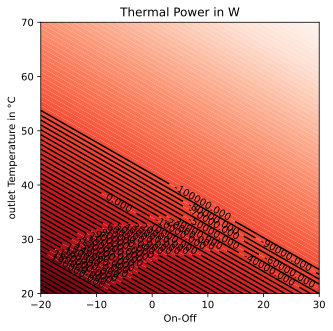

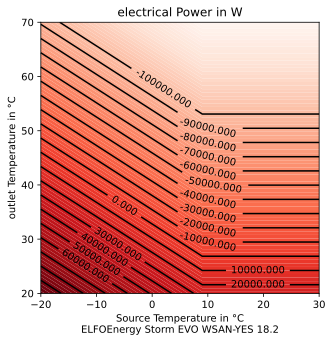

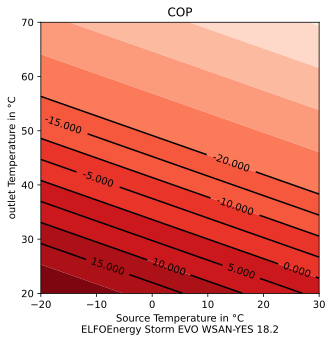

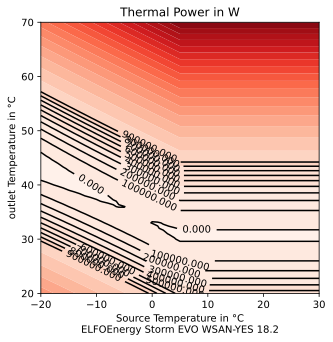

In [16]:
for model in Models:
    if model!='ELFOEnergy Storm EVO WSAN-YES 18.2':#define wich model to plot:  'LW 101' for on off 
                                                #   'SWCV 162(H)(K)3'; 'WPE-I 33H 400 Premium' for Inverter
                                                #   'LW 180A' ; 
        continue
    else:
        #reading parameters
        onemodel = paradf.loc[paradf['Model'] == model]
        k1 = onemodel['k1'].to_numpy()[0]#T_in for Pth
        k2 = onemodel['k2'].to_numpy()[0]#T_out for Pth
        k3 = onemodel['k3'].to_numpy()[0]#constant for Pth
        k4 = onemodel['k4'].to_numpy()[0]#T_in for Pel
        k5 = onemodel['k5'].to_numpy()[0]#T_out for Pel
        k6 = onemodel['k6'].to_numpy()[0]#constant for Pel
        k7 = onemodel['k7'].to_numpy()[0]#T_in for COP
        k8 = onemodel['k8'].to_numpy()[0]#T_in for COP
        k9 = onemodel['k9'].to_numpy()[0]#constant for COP
        modus = 'On-Off'
        T_low=[*range(-20,31,1)]#inflow TEMP
        T_high=[*range(20,71,1)]#outflow TEMP
        Tin=[]
        Tout=[]
        Pth_keyfit=[]

        for x in T_low:
            for y in T_high:
                p_th_keyfit = k1*x + k2*y + k3#formula for Pth
                Tin.append(x)
                Tout.append(y)
                Pth_keyfit.append(p_th_keyfit)
        #create Dataframe for plotting        
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(-100000,1000000,10000)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()


        # KEYMARK fit from P_el
        #Pel(x,y)=k4*x+k5*y+k6
        Tin=[]
        Tout=[]
        Pel_keyfit=[]
        for x in T_low:
            for y in T_high:
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6): #define minimum value of electric Power
                if x>9: #7-11
                    p_el = 9*k4+k5*y+k6
                else:
                    #otherwise use the normal formula of the fit
                    p_el = k4*x + k5*y + k6 
                Tin.append(x)
                Tout.append(y)
                Pel_keyfit.append(p_el)
        #Create dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pel']=Pel_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pel').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(-100000,1000000,10000)])

        # Generate a color mapping of the levels we've specified
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
       
        #COP Keyfit:
        #COP(x,y)=k7*x+k8*y+k9
        Tin=[]
        Tout=[]
        COP_keyfit=[]
        for x in T_low:
            for y in T_high:
                #calculate COP from the fit parameters
                cop = k7*x + k8*y + k9
                Tin.append(x)
                Tout.append(y)
                COP_keyfit.append(cop)
        #Create Dataframe for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['COP']=COP_keyfit
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='COP').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(-20,20,5)])

        # Generate a color mapping of the levels we've specified
        
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n'+ model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()

        #Pth from parameters of COP and Pel
        # Pth(x,y)=Pel(x,y)*COP(x,y)
        # Pth(x,y)=k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
        Tin=[]
        Tout=[]
        Pth=[]
        for x in T_low:
            for y in T_high:
                p_th_12=k5*k7*x*y+k6*k7*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #value if k4=0 see electric Power for more details
                pel_12=k5*y+k6 # pel @ 12 °C -> k4 = 0, so the minimum electric Power of inverter Heatpump is reached.
                #if pel_12>(k4*x + k5*y + k6):
                if x>5: #4-7°C
                    p_th = k4*k7*5*5+(k4*k8+k5*k7)*5*y+(k4*k9+k6*k7)*5+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                else:
                    p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y #normal formula of the fit
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        #Create DataFrame for plotting
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(-1000000,1000000,100000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n' + model)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
